# Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering 

In [3]:
table1 = pd.read_csv(r"C:\Users\jesss\OneDrive\Documents\GitHub\ITCS3162\datasets\comodity2017.csv")

In [3]:
table1.head()

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
0,1,6,99999,06-99999,6,260,06-260,326,4,43,5,4380,391,54,60,N,N,N,N,328.3
1,2,49,482,49-482,47,314,47-314,4541,3,43,14,56,4,1524,1810,N,N,N,N,8425.3
2,3,6,348,06-348,6,348,06-348,4231,4,34,5,255,440,2,5,N,N,N,N,9120.7
3,4,6,260,06-260,6,99999,06-99999,212,4,11,5,250,44912,30,35,N,N,N,N,20.9
4,5,45,273,45-273,45,273,45-273,45431,4,19,5,46,73,9,11,N,N,N,H,1733.8


In [4]:
table1.describe()

,SHIPMT_ID,ORIG_STATE,ORIG_MA,DEST_STATE,DEST_MA,NAICS,QUARTER,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,WGT_FACTOR
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242880e+05,2.908364e+01,3.876737e+04,2.878322e+01,3.956260e+04,8.527142e+03,2.439977e+00,7.238447e+00,1.510316e+04,2.907865e+04,3.872609e+02,4.753405e+02,2.656200e+03
std,3.026977e+05,1.568280e+01,4.695228e+04,1.584014e+01,4.689833e+04,5.347247e+04,1.106954e+00,4.386159e+00,7.553447e+05,1.013306e+06,5.821130e+02,6.981747e+02,1.722064e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.040000e+02,2.120000e+02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-01
25%,2.621445e+05,1.700000e+01,3.120000e+02,1.500000e+01,3.240000e+02,3.260000e+02,1.000000e+00,4.000000e+00,1.460000e+02,1.100000e+01,1.600000e+01,2.100000e+01,1.075000e+02
50%,5.242880e+05,2.900000e+01,4.760000e+02,2.900000e+01,4.880000e+02,4.233000e+03,2.000000e+00,5.000000e+00,7.490000e+02,1.900000e+02,1.060000e+02,1.350000e+02,3.505000e+02
75%,7.864315e+05,4.200000e+01,9.999900e+04,4.200000e+01,9.999900e+04,4.244000e+03,3.000000e+00,1.400000e+01,5.219500e+03,5.955000e+03,5.350000e+02,6.740000e+02,1.190100e+03
max,1.048575e+06,5.600000e+01,9.999900e+04,5.600000e+01,9.999900e+04,5.511140e+05,4.000000e+00,1.010000e+02,3.297804e+08,4.366540e+08,5.137000e+03,6.876000e+03,7.864000e+05


In [4]:
table1["EXPORT_YN"] = table1["EXPORT_YN"].astype("category").cat.codes
table1["EXPORT_CNTRY"] = table1["EXPORT_CNTRY"].astype("category").cat.codes

export_analysis = table1[[
    "EXPORT_YN",
    "EXPORT_CNTRY",
    "SHIPMT_VALUE",
    "SHIPMT_WGHT"
]]

scaled = StandardScaler().fit_transform(export_analysis)

results = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled)
    inertia = km.inertia_
    silhouette = silhouette_score(
        scaled, labels, sample_size=5000, random_state=42
    )

    results.append([k, inertia, silhouette])

print("k | Inertia (WSS) | Silhouette Score")
for k, inertia, sil in results:
    print(f"{k} | {inertia:.2f} | {sil:.4f}")


k | Inertia (WSS) | Silhouette Score
2 | 2315921.54 | 0.9808
3 | 1462119.95 | 0.9808
4 | 985947.97 | 0.9813
5 | 854803.39 | 0.9815
6 | 539913.61 | 0.9824
7 | 375262.19 | 0.9824


To describe my data mining process for this clustering model first I will describe what this model is. This is a comparative K-means clustering model that uses several values of k. This model is meant to calculate inertia and silhouette scores for each tested k value to evaluate the cluster quality. The reason why I am made this model is to discover any patterns in export shipments, I also wanted to determine with the clustering model how shipments group together based on export status, destination country, value, and weight. How I made this clustering model is by first making EXPORT_YN and EXPORT_CNTRY numerical categories, then I made a table with important factors for analying the exporting. After that I scaled the selected features and compared multiple K values, lastly I made the compared multiple K values results visual. 

In [5]:
# Convert export columns into numeric codes
table1["EXPORT_YN"] = table1["EXPORT_YN"].astype("category").cat.codes
table1["EXPORT_CNTRY"] = table1["EXPORT_CNTRY"].astype("category").cat.codes

# Select features for clustering
export_analysis = table1[[
    "EXPORT_YN",
    "EXPORT_CNTRY",
    "SHIPMT_VALUE",
    "SHIPMT_WGHT"
]]

# Scale features
scaled = StandardScaler().fit_transform(export_analysis)

# Compare multiple K values
results = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled)
    inertia = km.inertia_
    silhouette = silhouette_score(
        scaled, labels, sample_size=5000, random_state=42
    )

    results.append([k, inertia, silhouette])

print("k | Inertia (WSS) | Silhouette Score")
for k, inertia, sil in results:
    print(f"{k} | {inertia:.2f} | {sil:.4f}")

k | Inertia (WSS) | Silhouette Score
2 | 2315921.54 | 0.9808
3 | 1462119.95 | 0.9808
4 | 985947.97 | 0.9813
5 | 854803.39 | 0.9815
6 | 539913.61 | 0.9824
7 | 375262.19 | 0.9824


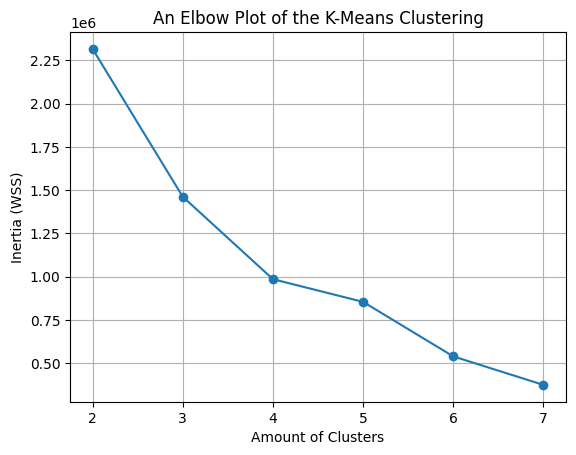

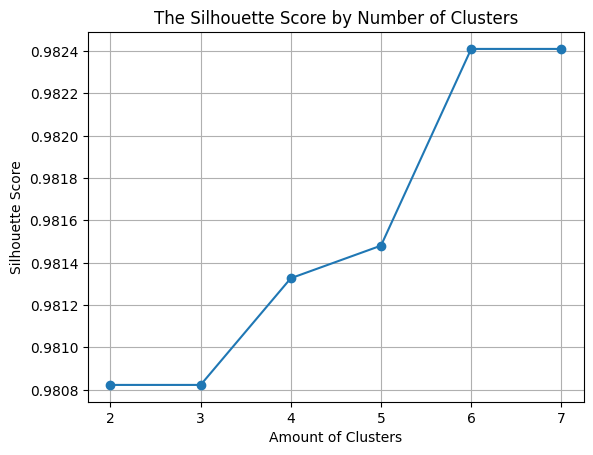

In [6]:
k_values = [row[0] for row in results]
inertias = [row[1] for row in results]
silhouettes = [row[2] for row in results] 

plt.plot(k_values, inertias, marker='o')
plt.xlabel("Amount of Clusters")
plt.ylabel("Inertia (WSS)")
plt.title("An Elbow Plot of the K-Means Clustering")
plt.grid(True)
plt.show()

plt.plot(k_values, silhouettes, marker='o')
plt.xlabel("Amount of Clusters")
plt.ylabel("Silhouette Score")
plt.title("The Silhouette Score by Number of Clusters")
plt.grid(True)
plt.show()